In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

In [147]:
os.chdir('/Users/sahoko/GitHub/WFP-GP-temporary/')
country_list = os.listdir('Data/Foini2023/output_data')
country_list.remove('.DS_Store')
country_list

['Syria', 'Burkina-Faso', 'Yemen', 'Mali', 'Nigeria', 'Niger', 'Cameroon']

In [263]:
for country in country_list:
    #if (country == 'Burkina-Faso' or country == 'Niger'):
    #    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'-day.csv'
    #else:
    #    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'
    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'
    df =  pd.read_csv(file, header=[0,1])
    
    region_list = df.columns.get_level_values(0)[1:].to_list()
    region_list = (list(dict.fromkeys(region_list)))
    column_list= df.columns.get_level_values(1)[1:].to_list()
    column_list = (list(dict.fromkeys(column_list)))
    df_missing = pd.DataFrame(columns=column_list)
    
    for region in region_list:
        ms_ct = len(df) - df[region].describe().loc['count'] 
        df_missing = pd.concat([df_missing, ms_ct.to_frame().T], ignore_index=True)
 
    df_missing.index = region_list    
    df_missing.to_csv('Data/Foini2023/Missing-data-info/Original/'+ country +'-missing.csv')   
    

In [264]:
df_info_ctry = pd.DataFrame(columns=['startday','lastday','n_days','n_areas'])

for country in country_list:
    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'    
    df =  pd.read_csv(file, header=[0,1])
    
    region_list = df.columns.get_level_values(0)[1:].to_list()
    column_list= df.columns.get_level_values(1)[1:].to_list()
    region_list = (list(dict.fromkeys(region_list)))
    column_list = (list(dict.fromkeys(column_list)))
    n_areas = len(region_list)
    first_tmp = []
    last_tmp = []
    
    for region in region_list:
        first_tmp.append(df[region]['FCG'].first_valid_index())
        last_tmp.append(df[region]['FCG'].last_valid_index())
        
    first = min(first_tmp)
    last = max(last_tmp)
    first_day = df['AdminStrata']['Indicator'][first]
    last_day = df['AdminStrata']['Indicator'][last]
    n_days =last-first
    new_row = pd.DataFrame({'startday':first_day,'lastday':last_day,'n_days':n_days,'n_areas':n_areas},
                       index=[country])
    df_info_ctry = pd.concat([df_info_ctry, new_row])
    
    df_missing = pd.DataFrame(columns=column_list)
    df_clean = df.iloc[first:last]
    for region in region_list:
        ms_ct = len(df_clean) - df_clean[region].describe().loc['count'] 
        df_missing = pd.concat([df_missing, ms_ct.to_frame().T], ignore_index=True)
    df_missing.index = region_list    
    df_missing.to_csv('Data/Foini2023/Missing-data-info/Cleaned/'+ country +'-missing-clean.csv')   
    
df_info_ctry.to_csv('Data/Foini2023/Missing-data-info/country-info.csv')


In [195]:
#df.columns.set_levels(['Time'] + region_list, level = 0, inplace = True)

In [265]:
country = 'Burkina-Faso'
file = 'Data/Foini2023/output_data/'+ country +'/' + country +'-day.csv'
df = pd.read_csv(file, header=[0,1])

In [267]:
region_list = df.columns.get_level_values(0)[1:].to_list()
column_list= df.columns.get_level_values(1)[1:].to_list()
region_list = (list(dict.fromkeys(region_list)))
column_list = (list(dict.fromkeys(column_list)))

In [281]:
df_rain_1m = pd.DataFrame(columns=['Datetime'])
df_rain_1m['Datetime'] = pd.to_datetime(df['AdminStrata']['Indicator'])
for region in region_list:
    df_rain_1m[region] = df[region]['1 Month Anomaly Rainfalls (%)']
df_rain_1m = df_rain_1m.set_index('Datetime')

In [ ]:
ax = df_rain_1m[region_list[0]].iloc[0:100].plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot();

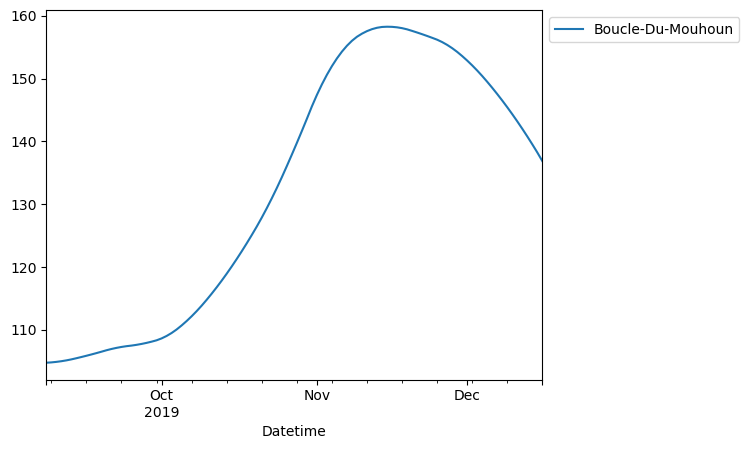

In [296]:
ax = df_rain_1m[region_list[0]].iloc[0:100].plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot();

In [293]:
df_rain_3m = pd.DataFrame(columns=['Datetime'])
df_rain_3m['Datetime'] = pd.to_datetime(df['AdminStrata']['Indicator'])
for region in region_list:
    df_rain_3m[region] = df[region]['3 Months Anomaly Rainfalls (%)']
df_rain_3m = df_rain_3m.set_index('Datetime')

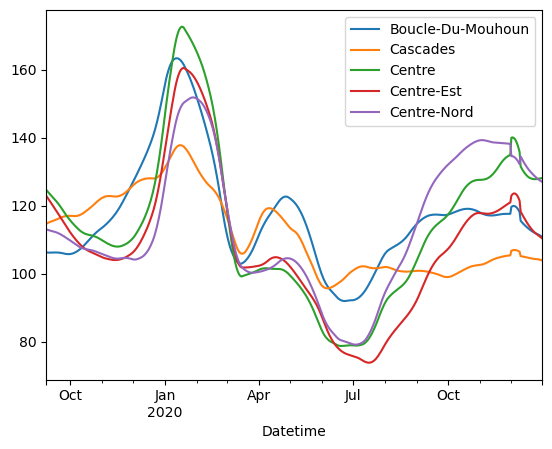

In [294]:
ax = df_rain_3m[region_list[0:5]].plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot();